#### IMPORT PACCKAGE AND DATA

In [67]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [69]:
dt = pd.read_csv('C:/Users/Win 10/Downloads/dataset.csv')
dt.head(10) # print the first 10 rows

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [70]:
items = dt['0'].unique() # print number of unique items
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

∗ Applying One Hot Encoding for data

In [71]:
itemset = set(items)
envals = []
for idx, row in dt.iterrows():
    rowset = set(row)
    labels = {}
    uncomms = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncomms:
            labels[uc] = 0
    for cm in commons:
        labels[cm] = 1
    envals.append(labels)

In [19]:
print(envals)

[{'Bagel': 0, 'Milk': 0, 'Bread': 1, 'Meat': 1, 'Wine': 1, 'Pencil': 1, 'Cheese': 1, 'Diaper': 1, 'Eggs': 1}, {'Bagel': 0, 'Eggs': 0, 'Bread': 1, 'Meat': 1, 'Wine': 1, 'Pencil': 1, 'Cheese': 1, 'Diaper': 1, 'Milk': 1}, {'Bread': 0, 'Bagel': 0, 'Diaper': 0, 'Pencil': 0, 'Meat': 1, 'Wine': 1, 'Cheese': 1, 'Milk': 1, 'Eggs': 1}, {'Bread': 0, 'Bagel': 0, 'Diaper': 0, 'Pencil': 0, 'Meat': 1, 'Wine': 1, 'Cheese': 1, 'Milk': 1, 'Eggs': 1}, {'Bread': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0, 'Meat': 1, 'Wine': 1, 'Pencil': 1}, {'Meat': 0, 'Cheese': 0, 'Bread': 1, 'Wine': 1, 'Pencil': 1, 'Diaper': 1, 'Milk': 1, 'Bagel': 1, 'Eggs': 1}, {'Bread': 0, 'Meat': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Cheese': 1, 'Eggs': 1, 'Wine': 1, 'Pencil': 1}, {'Meat': 0, 'Cheese': 0, 'Eggs': 0, 'Wine': 0, 'Bread': 1, 'Pencil': 1, 'Diaper': 1, 'Milk': 1, 'Bagel': 1}, {'Bagel': 0, 'Meat': 0, 'Pencil': 0, 'Bread': 1, 'Wine': 1, 'Cheese': 1, 'Diaper': 1, 'Milk': 1, 'Eggs': 1}, {'Bread': 0, 'Milk

∗ Applying Apriori for the processed data

In [72]:
ohedt = pd.DataFrame(envals)
fitems = apriori(ohedt, min_support=0.2, use_colnames=True, verbose=1)
fitems[0:50]

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.504762,(Bread)
3,0.476190,(Meat)
4,0.438095,(Wine)
5,0.361905,(Pencil)
6,0.501587,(Cheese)
7,0.406349,(Diaper)
8,0.438095,(Eggs)
9,0.225397,"(Bagel, Milk)"


In [73]:
rules= association_rules(fitems, metric='confidence', min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891


∗ Visualizing results

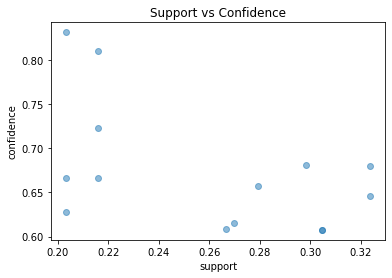

In [74]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### Excercise: Apply apriori and association rules to the new data store.csv provided and submit the result.

In [82]:
data = pd.read_csv('C:/Users/Win 10/Downloads/store.csv')
data.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
items = data['0'].unique() # print number of unique items
items

array(['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water',
       'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables',
       'french fries', 'eggs', 'cookies', 'spaghetti', 'meatballs',
       'red wine', 'rice', 'parmesan cheese', 'ground beef',
       'sparkling water', 'herb & pepper', 'pickles', 'energy bar',
       'fresh tuna', 'escalope', 'avocado', 'tomato sauce',
       'clothes accessories', 'energy drink', 'chocolate',
       'grated cheese', 'yogurt cake', 'mint', 'asparagus', 'champagne',
       'ham', 'muffins', 'french wine', 'chicken', 'pasta', 'tomatoes',
       'pancakes', 'frozen smoothie', 'carrots', 'yams', 'shallot',
       'butter', 'light mayo', 'pepper', 'candy bars', 'cooking oil',
       'milk', 'green tea', 'bug spray', 'oil', 'olive oil', 'salmon',
       'cake', 'almonds', 'salt', 'strong cheese', 'hot dogs', 'pet food',
       'whole wheat rice', 'antioxydant juice', 'honey', 'sandwich',
       'salad', 'magazines', 'protein bar', '

In [84]:
itemset = set(items)
envals = []
for idx, row in data.iterrows():
    rowset = set(row)
    labels = {}
    uncomms = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncomms:
            labels[uc] = 0
    for cm in commons:
        labels[cm] = 1
    envals.append(labels)

In [77]:
print(envals)

[{'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat': 0, 'Wine': 0, 'Pencil': 0, 'Cheese': 0, 'Diaper': 0, 'Milk': 0, 'Bagel': 0, 'Eggs': 0}, {'Bread': 0, 'Meat

∗ Applying Apriori for the processed data

In [88]:
ohedt = pd.DataFrame(envals)
fitems = apriori(ohedt, min_support=0.1, use_colnames=True, verbose=1)
print(fitems)

Processing 42 combinations | Sampling itemset size 2
    support         itemsets
0  0.179709           (eggs)
1  0.174110      (spaghetti)
2  0.129583           (milk)
3  0.163845      (chocolate)
4  0.170911   (french fries)
5  0.238368  (mineral water)
6  0.132116      (green tea)


In [89]:
rules= association_rules(fitems, metric='confidence', min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


∗ Visualizing results

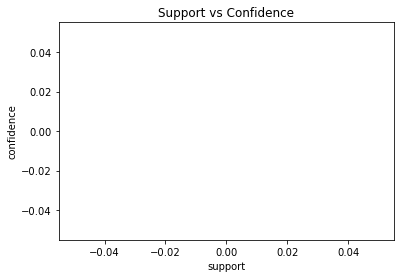

In [90]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()